## Imports, Reading Data, Setting up tests

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


In [3]:
training_data = pd.read_csv('/home/ec2-user/capstone/broadband-capstone/data/current_data/test_3.csv')
test_data = pd.read_csv('/home/ec2-user/capstone/broadband-capstone/data/current_data/train_3.csv')

In [3]:
#All except income variables
all_vars = [ 'tract_geoid',
             'All_Provider_Count',
             'MaxAdDown',
             'MaxAdUp',
             'Wired_Provider_Count',
             'Satellite_Provider_Count',
             'Fixed_Wireless_Provider_Count',
             'All_Provider_Count_25',
             'All_Provider_Count_100',
             'Fixed_Wireless_Provider_Count_25',
             'Wired_Provider_Count_25',
             'Satellite_Provider_Count_25',
             'Fixed_Wireless_Provider_Count_100',
             'Wired_Provider_Count_100',
             'Satellite_Provider_Count_100',
             'median_age_overall',
             'median_age_male',
             'median_age_female',
             'state',
             'county',
             'tract',
             'employment_rate',
             'total_households',
             'ave_household_size',
             'ave_family_size',
             'pct_health_ins_children',
             'pct_health_ins_19_64',
             'pct_health_ins_65+',
             'total_population',
             'pct_white',
             'pct_hisp_latino',
             'pct_black',
             'pct_native',
             'pct_asian',
             'pct_hi_pi',
             'pct_other_race',
             'pct_two+_race',
             'pct_pop_bachelors+',
             'pct_pop_hs+',
             'pct_internet',
             'pct_internet_dial_up',
             'pct_internet_broadband_any_type',
             'pct_internet_cellular',
             'pct_only_cellular',
             'pct_internet_broadband_fiber',
             'pct_internet_broadband_satellite',
             'pct_internet_only_satellite',
             'pct_internet_other',
             'pct_internet_no_subscrp',
             'pct_internet_none',
             'pct_computer',
             'pct_computer_with_dialup',
             'pct_computer_with_broadband',
             'pct_computer_no_internet',
             'pct_no_computer',
             'ALAND',
             'AWATER',
             'ALAND_SQMI',
             'AWATER_SQMI',
             'population_density',
             'pct_pop_ged',
             'pct_pop_some_college',
             'pct_pop_associates',
             'pct_pop_lt_5',
             'pct_pop_5_to_9',
             'pct_pop_10_to_14',
             'pct_pop_15_to_19',
             'pct_pop_20_to_24',
             'pct_pop_25_to_29',
             'pct_pop_30_to_34',
             'pct_pop_35_to_39',
             'pct_pop_40_to_44',
             'pct_pop_45_to_49',
             'pct_pop_50_to_54',
             'pct_pop_55_to_59',
             'pct_pop_60_to_64',
             'pct_pop_65_to_69',
             'pct_pop_70_to_74',
             'pct_pop_75_to_79',
             'pct_pop_80_to_84',
             'pct_pop_gt_85',
             'pct_pop_disability',
             'pct_pop_households_with_kids',
             'pct_pop_foreign_born',
             'Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             'Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps)',
             'Ookla Median Download Speed (Mbps)',
             'Ookla Median Upload Speed (Mbps)',
             'Primary RUCA Code 2010',
             'Secondary RUCA Code, 2010 (see errata)',
             '0_5_providers',
             '6_10_providers',
             '11_15_providers',
             '16_20_providers',
             '20+_providers',
             '0_25_MaxAdDown',
             '25_99_MaxAdDown',
             '99_499_MaxAdDown',
             '499_inf_MaxAdDown',
             '0_25_Ookla Median Download Speed (Mbps)',
             '25_99_Ookla Median Download Speed (Mbps)',
             '99_499_Ookla Median Download Speed (Mbps)',
             '499_inf_Ookla Median Download Speed (Mbps)',
             '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
             'single_provider',
             'Primary RUCA Code - 1.0',
             'Primary RUCA Code - 2.0',
             'Primary RUCA Code - 4.0',
             'Primary RUCA Code - 10.0',
             'Primary RUCA Code - 7.0',
             'Primary RUCA Code - 5.0',
             'Primary RUCA Code - 8.0',
             'Primary RUCA Code - 3.0',
             'Primary RUCA Code - 6.0',
             'Primary RUCA Code - 9.0',
             'Primary RUCA Code - 99.0',
             'Secondary RUCA Code - 1.0',
             'Secondary RUCA Code - 2.0',
             'Secondary RUCA Code - 4.0',
             'Secondary RUCA Code - 10.0',
             'Secondary RUCA Code - 7.0',
             'Secondary RUCA Code - 5.0',
             'Secondary RUCA Code - 1.1',
             'Secondary RUCA Code - 8.0',
             'Secondary RUCA Code - 3.0',
             'Secondary RUCA Code - 6.0',
             'Secondary RUCA Code - 9.0',
             'Secondary RUCA Code - 4.1',
             'Secondary RUCA Code - 99.0',
             'Secondary RUCA Code - 7.1',
             'Secondary RUCA Code - 10.2',
             'Secondary RUCA Code - 2.1',
             'Secondary RUCA Code - 10.1',
             'Secondary RUCA Code - 10.3',
             'Secondary RUCA Code - 7.2',
             'Secondary RUCA Code - 5.1',
             'Secondary RUCA Code - 8.1',
             'Secondary RUCA Code - 8.2']

In [15]:
variables

['tract_geoid',
 'All_Provider_Count',
 'MaxAdDown',
 'MaxAdUp',
 'Wired_Provider_Count',
 'Satellite_Provider_Count',
 'Fixed_Wireless_Provider_Count',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Fixed_Wireless_Provider_Count_25',
 'Wired_Provider_Count_25',
 'Satellite_Provider_Count_25',
 'Fixed_Wireless_Provider_Count_100',
 'Wired_Provider_Count_100',
 'Satellite_Provider_Count_100',
 'NAME',
 'median_age_overall',
 'median_age_male',
 'median_age_female',
 'state',
 'county',
 'tract',
 'employment_rate',
 'median_income',
 'total_households',
 'ave_household_size',
 'ave_family_size',
 'pct_health_ins_children',
 'pct_health_ins_19_64',
 'pct_health_ins_65+',
 'total_population',
 'median_house_value',
 'pct_white',
 'pct_hisp_latino',
 'pct_black',
 'pct_native',
 'pct_asian',
 'pct_hi_pi',
 'pct_other_race',
 'pct_two+_race',
 'pct_rent_burdened',
 'poverty_rate',
 'pct_pop_bachelors+',
 'pct_pop_hs+',
 'pct_internet',
 'pct_internet_dial_up',
 'pct_internet_broadba

In [15]:
training_data.columns[50:100]

Index(['pct_internet_broadband_fiber', 'pct_internet_broadband_satellite',
       'pct_internet_only_satellite', 'pct_internet_other',
       'pct_internet_no_subscrp', 'pct_internet_none', 'pct_computing_device',
       'pct_computing_device_with_dialup',
       'pct_computing_device_with_broadband',
       'pct_computing_device_no_internet', 'pct_no_computing_device', 'ALAND',
       'AWATER', 'ALAND_SQMI', 'AWATER_SQMI', 'population_density',
       'pct_pop_ged', 'pct_pop_some_college', 'pct_pop_associates',
       'pct_pop_ssi_households', 'pct_pop_lt_10k', 'pct_pop_10k_thru_15k',
       'pct_pop_15k_thru_20k', 'pct_pop_20k_thru_25k', 'pct_pop_25k_thru_30k',
       'pct_pop_30k_thru_35k', 'pct_pop_35k_thru_40k', 'pct_pop_40k_thru_45k',
       'pct_pop_45k_thru_50k', 'pct_pop_50k_thru_60k', 'pct_pop_60k_thru_75k',
       'pct_pop_75k_thru_100k', 'pct_pop_100k_thru_125k',
       'pct_pop_125k_thru_150k', 'pct_pop_150k_thru_200k', 'pct_pop_gt_200k',
       'pct_pop_lt_5', 'pct_pop_5_

In [16]:
broadband_vars = ['MaxAdDown',
                 'MaxAdUp',
                 'Wired_Provider_Count',
                 'Satellite_Provider_Count',
                 'Fixed_Wireless_Provider_Count',
                 'All_Provider_Count_25',
                 'All_Provider_Count_100',
                 'Fixed_Wireless_Provider_Count_25',
                 'Wired_Provider_Count_25',
                 'Satellite_Provider_Count_25',
                 'Fixed_Wireless_Provider_Count_100',
                 'Wired_Provider_Count_100',
                 'Satellite_Provider_Count_100',
                 'pct_internet',
                 'pct_internet_dial_up',
                 'pct_internet_broadband_any_type',
                 'pct_internet_cellular',
                 'pct_only_cellular',
                 'pct_internet_broadband_fiber',
                 'pct_internet_broadband_satellite',
                 'pct_internet_only_satellite',
                 'pct_internet_other',
                 'pct_internet_no_subscrp',
                 'pct_internet_none',
                 'pct_computing_device',
                 'pct_computing_device_with_dialup',
                 'pct_computing_device_with_broadband',
                 'pct_computing_device_no_internet',
                 'pct_no_computing_device',
                 'Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 'Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps)',
                 'Ookla Median Download Speed (Mbps)',
                 'Ookla Median Upload Speed (Mbps)',
                 '0_5_providers',
                 '6_10_providers',
                 '11_15_providers',
                 '16_20_providers',
                 '20+_providers',
                 '0_25_MaxAdDown',
                 '25_99_MaxAdDown',
                 '99_499_MaxAdDown',
                 '499_inf_MaxAdDown',
                 '0_25_Ookla Median Download Speed (Mbps)',
                 '25_99_Ookla Median Download Speed (Mbps)',
                 '99_499_Ookla Median Download Speed (Mbps)',
                 '499_inf_Ookla Median Download Speed (Mbps)',
                 '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 'single_provider',
                 'Comcast_present',
                 'ATT_present',
                 'HughesNet_present',
                 'GCI_Comm_Corp_present',
                 'ViaSat_present',
                 'VSAT_present',
                 'Century_Link_present',
                 'Spectrum_present',
                 'Crown_Castle_present',
                 'Etheric_present',
                 'Frontier_Communications_present',
                 'pct_of_internet_users_with_broadband',
                 'log_median_income_over_log_median_house', 
                 'pct_desktop_or_laptop',
                 'pct_smartphone', 
                 'pct_only_smartphone',
                 'pct_tablet']

## Modeling

### Functions

In [5]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [6]:
poverty_rate_train = np.array(training_data['poverty_rate'])
poverty_rate_test = np.array(test_data['poverty_rate'])

def poverty_XGBoost_model(train_df, 
                          test_df, 
                          variable_list,
                          poverty_rate_train = poverty_rate_train,  
                          poverty_rate_test = poverty_rate_test):
    train_variables = np.array(train_df[variable_list])
    test_variables = np.array(test_df[variable_list])
    
    model = XGBRegressor().fit(train_variables, poverty_rate_train)
    predicted = model.predict(test_variables)
    
    regression_results(poverty_rate_test, predicted)
    
    return pd.DataFrame(model.feature_importances_, 
                        index = variable_list).sort_values(by=0, ascending = False)


In [14]:
poverty_XGBoost_model(training_data, test_data, all_broadband_variables)

explained_variance:  0.4887
r2:  0.4886
MAE:  5.3967
MSE:  57.9994
RMSE:  7.6157


True

In [15]:
poverty_XGBoost_model(training_data, test_data, high_corr)

explained_variance:  0.4337
r2:  0.4337
MAE:  5.7247
MSE:  64.2296
RMSE:  8.0143


True

In [16]:
poverty_XGBoost_model(training_data, test_data, mid_corr)

explained_variance:  0.4648
r2:  0.4647
MAE:  5.5515
MSE:  60.7112
RMSE:  7.7917


True

In [17]:
poverty_XGBoost_model(training_data, test_data, small_covariance_med_corr) 

explained_variance:  0.43
r2:  0.4299
MAE:  5.6992
MSE:  64.6642
RMSE:  8.0414


True

In [17]:
feature_importance_all_vars = poverty_XGBoost_model(training_data, 
                                                    test_data, 
                                                    broadband_vars) 


explained_variance:  0.6093
r2:  0.6093
MAE:  4.9109
MSE:  47.2934
RMSE:  6.877


From the all_vars model, we can pick the top variables to use in the grid search. 

<AxesSubplot:>

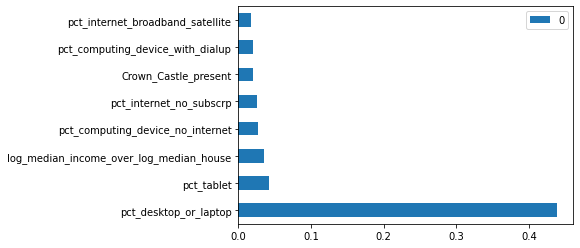

In [18]:
feature_importance_all_vars.head(8).plot.barh()

In [19]:
feature_importance_all_vars.head(7).index.values

array(['pct_desktop_or_laptop', 'pct_tablet',
       'log_median_income_over_log_median_house',
       'pct_computing_device_no_internet', 'pct_internet_no_subscrp',
       'Crown_Castle_present', 'pct_computing_device_with_dialup'],
      dtype=object)

In [15]:
key_vars = ['pct_internet', 
            'pct_computer_with_broadband',
            'median_age_overall', 
            'pct_white', 
            'pct_pop_20_to_24',
            'employment_rate', 
            'pct_pop_bachelors+']

In [7]:
feature_importance_broadband_vars = poverty_XGBoost_model(training_data, 
                                                          test_data, 
                                                          broadband_vars) 


KeyError: "['pct_computer', 'pct_computer_with_dialup', 'pct_computer_with_broadband', 'pct_computer_no_internet', 'pct_no_computer'] not in index"

<AxesSubplot:>

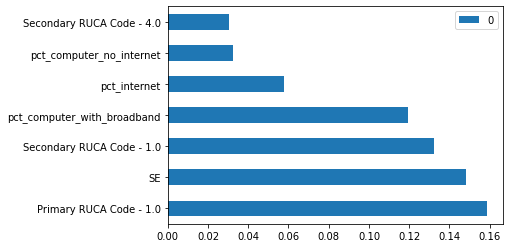

In [40]:
feature_importance_broadband_vars.head(7).plot.barh()

In [6]:
#key_vars = feature_importance_broadband_vars.head(7).index.values
key_vars = ['Primary RUCA Code - 1.0',
            'SE',
            'Secondary RUCA Code - 1.0',
            'pct_computer_with_broadband',
            'pct_internet',
            'pct_computer_no_internet',
            'Secondary RUCA Code - 4.0']

## Tuning the model

In [44]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

regressor_tuned = XGBRegressor()

regress = RandomizedSearchCV(estimator=regressor_tuned, 
                             param_distributions=params,
                             scoring='neg_mean_squared_error', 
                             verbose=10,
                             n_iter = 20,
                             cv = 3,
                             random_state=42)

regress.fit(training_data[key_vars], poverty_rate_train)




Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500
[CV 1/3; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-48.475 total time=   4.6s
[CV 2/3; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500
[CV 2/3; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-50.595 total time=   4.6s
[CV 3/3; 1/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500
[CV 3/3; 1/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-49.102 total time=   4.6s
[CV 1/3; 2/20] START colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500
[CV 1/3; 2/20] END colsample_bytree=0.7, learning_rate=0.1, max_depth=6, n_estimators=500;, score=-49.333 total time=  12.8s
[CV 2/3; 2/20] START colsample_bytree=0.7, learning_rate=0.1, max_depth

[CV 2/3; 13/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=1000;, score=-55.556 total time=  25.7s
[CV 3/3; 13/20] START colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=1000
[CV 3/3; 13/20] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=1000;, score=-54.288 total time=  25.6s
[CV 1/3; 14/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100
[CV 1/3; 14/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100;, score=-95.965 total time=   2.8s
[CV 2/3; 14/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100
[CV 2/3; 14/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100;, score=-98.538 total time=   2.8s
[CV 3/3; 14/20] START colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100
[CV 3/3; 14/20] END colsample_bytree=0.3, learning_rate=0.01, max_depth=10, n_estimators=100;, score=-96.700

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [45]:
print("Best parameters:", regress.best_params_)
print("Lowest RMSE: ", (-regress.best_score_)**(1/2.0))
y_pred = regress.predict(test_data[key_vars])

regression_results(poverty_rate_test, y_pred)

Best parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Lowest RMSE:  6.998003206044112
explained_variance:  0.597
r2:  0.597
MAE:  4.9528
MSE:  48.2814
RMSE:  6.9485


---

### California Data

In [5]:
cali_train_data = training_data[training_data.state == 6]
cali_test_data = test_data[test_data.state == 6]

In [9]:
regressor = XGBRegressor(n_estimators = 500, max_depth = 3, learning_rate = 0.05, colsample_bytree = 0.7)
regressor.fit(cali_train_data[key_vars],  np.array(cali_train_data['poverty_rate']))
predictions = regressor.predict(cali_test_data[key_vars])
regression_results(np.array(cali_test_data['poverty_rate']), predictions)


explained_variance:  0.5585
r2:  0.558
MAE:  4.5977
MSE:  43.3611
RMSE:  6.5849
